In [2]:
from pyspark import SparkContext
from pyspark.sql import SQLContext


sc = SparkContext('local', 'Spark SQL') 
spark = SQLContext(sc)

In [3]:
spark

In [5]:
df = spark.read.csv("UTF8_2018_Viagem.csv", header=True, sep=";")

In [7]:
df.printSchema()

root
 |-- Identificador do processo de viagem: string (nullable = true)
 |-- Número da Proposta (PCDP): string (nullable = true)
 |-- Situação: string (nullable = true)
 |-- Viagem Urgente: string (nullable = true)
 |-- Justificativa Urgência Viagem: string (nullable = true)
 |-- Código do órgão superior: string (nullable = true)
 |-- Nome do órgão superior: string (nullable = true)
 |-- Código órgão solicitante: string (nullable = true)
 |-- Nome órgão solicitante: string (nullable = true)
 |-- CPF viajante: string (nullable = true)
 |-- Nome: string (nullable = true)
 |-- Cargo: string (nullable = true)
 |-- Função: string (nullable = true)
 |-- Descrição Função: string (nullable = true)
 |-- Período - Data de início: string (nullable = true)
 |-- Período - Data de fim: string (nullable = true)
 |-- Destinos: string (nullable = true)
 |-- Motivo: string (nullable = true)
 |-- Valor diárias: string (nullable = true)
 |-- Valor passagens: string (nullable = true)
 |-- Valor outros gast

In [9]:
df.limit(5).toPandas()

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,...,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
0,0000000000013501576,Sem informação,Realizada,NÃO,Sem informação,36000,Ministério da Saúde,36201,Fundação Oswaldo Cruz,***.637.547-**,...,PESQUISADOR EM SAUDE PUBLICA,-1,Não Informado,10/02/2018,02/03/2018,Coimbra/Portugal,PARTICIPAÇÃO EM PROJETOS DE PESQUISA DESENVOLV...,"0,00","0,00","0,00"
1,0000000000014026421,Sem informação,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.199.590-**,...,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Não Informado,09/01/2018,19/11/2018,Bloomington - Indiana/Estados Unidos da América,Estágio pós-doutoral no exterior.,"0,00","0,00","0,00"
2,0000000000014046485,Sem informação,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26405,Instituto Federal do Ceará,***.061.023-**,...,None,-1,Não Informado,23/02/2018,25/02/2018,Meruoca/CE,Realizar o encontro presencial da Disciplina ...,"537,50","98,68","0,00"
3,0000000000014108743,Sem informação,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26258,Universidade Tecnológica Federal do Paraná,***.414.389-**,...,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Não Informado,17/01/2018,16/02/2018,Lisboa/Portugal,Estágio/Intercâmbio Internacional no IPPORTO P...,"0,00","0,00","0,00"
4,0000000000014112304,Sem informação,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26279,Fundação Universidade Federal do Piauí,***.836.653-**,...,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Não Informado,04/01/2018,06/01/2018,Bom Jesus/PI,o mesmo participará de solenidades de FORMATUR...,"487,11","0,00","0,00"


In [10]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

In [11]:
def to_value(v):
    try:
        return float(v.replace(",","."))
    except:
        return 0.0
udf_to_value = F.udf(to_value, FloatType()) 

In [16]:
df_typed = df.withColumn("ValorPassagens", udf_to_value(df["Valor passagens"])) \
.withColumn("ValorDiarias", udf_to_value(df["Valor diárias"])) \
.withColumn("ValorOutros", udf_to_value(df["Valor outros gastos"]))

In [18]:
df_typed.limit(5).toPandas()

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,...,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos,ValorPassagens,ValorDiarias,ValorOutros
0,0000000000013501576,Sem informação,Realizada,NÃO,Sem informação,36000,Ministério da Saúde,36201,Fundação Oswaldo Cruz,***.637.547-**,...,10/02/2018,02/03/2018,Coimbra/Portugal,PARTICIPAÇÃO EM PROJETOS DE PESQUISA DESENVOLV...,"0,00","0,00","0,00",0.00,0.000000,0.0
1,0000000000014026421,Sem informação,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.199.590-**,...,09/01/2018,19/11/2018,Bloomington - Indiana/Estados Unidos da América,Estágio pós-doutoral no exterior.,"0,00","0,00","0,00",0.00,0.000000,0.0
2,0000000000014046485,Sem informação,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26405,Instituto Federal do Ceará,***.061.023-**,...,23/02/2018,25/02/2018,Meruoca/CE,Realizar o encontro presencial da Disciplina ...,"537,50","98,68","0,00",98.68,537.500000,0.0
3,0000000000014108743,Sem informação,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26258,Universidade Tecnológica Federal do Paraná,***.414.389-**,...,17/01/2018,16/02/2018,Lisboa/Portugal,Estágio/Intercâmbio Internacional no IPPORTO P...,"0,00","0,00","0,00",0.00,0.000000,0.0
4,0000000000014112304,Sem informação,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26279,Fundação Universidade Federal do Piauí,***.836.653-**,...,04/01/2018,06/01/2018,Bom Jesus/PI,o mesmo participará de solenidades de FORMATUR...,"487,11","0,00","0,00",0.00,487.109985,0.0


In [19]:
df_typed.select("Nome órgão solicitante","ValorPassagens").limit(5).toPandas()

,Nome órgão solicitante,ValorPassagens
0,Fundação Oswaldo Cruz,0.00
1,Fundação Universidade Federal do ABC,0.00
2,Instituto Federal do Ceará,98.68
3,Universidade Tecnológica Federal do Paraná,0.00
4,Fundação Universidade Federal do Piauí,0.00


In [25]:
pd = df_typed.groupBy("Nome do órgão superior") \
.agg((F.sum("ValorPassagens") / F.lit(1_000_000)).alias("Total")) \
.orderBy("Total", ascending=False).toPandas()
pd

,Nome do órgão superior,Total
0,Ministério da Educação,146.676868
1,Ministério da Defesa,61.297300
2,Ministério da Justiça e Segurança Pública,57.052195
3,Ministério da Economia,47.470802
4,Ministério da Saúde,32.614710
5,Ministério das Relações Exteriores,21.016080
6,Ministério da Infraestrutura,19.608423
7,Presidência da República,17.917395
8,"Ministério da Agricultura, Pecuária e Abasteci...",16.938476
9,Ministério do Meio Ambiente,16.926997


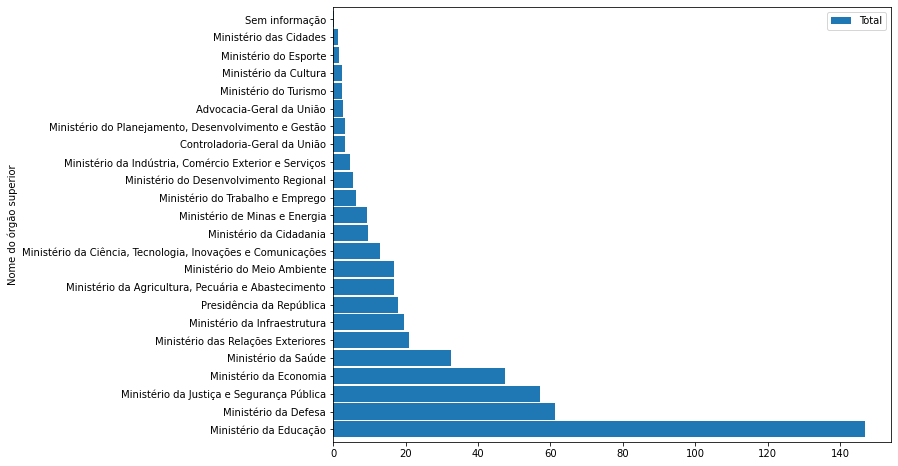

In [35]:
%matplotlib inline
pd.plot(kind="barh", x="Nome do órgão superior", figsize=[10, 8], width=0.9)

In [46]:
df_typed.groupBy("Nome do órgão superior","Nome","CPF viajante") \
.agg(((F.sum("ValorPassagens") + F.sum("ValorDiarias") + F.sum("ValorOutros"))/ F.lit(1_000)) \
     .alias("ValorTotal"), \
    F.count("ValorPassagens").alias("Qtd")) \
.filter("Nome !='Informações protegidas por sigilo'") \
.orderBy("ValorTotal", ascending=False) \
.limit(10) \
.toPandas()


,Nome do órgão superior,Nome,CPF viajante,ValorTotal,Qtd
0,Ministério da Cultura,SERGIO HENRIQUE SA LEITAO FILHO,***.010.857-**,325.864211,50
1,"Ministério da Indústria, Comércio Exterior e S...",MARCOS JORGE DE LIMA,***.678.252-**,313.560331,74
2,Ministério da Educação,JOICE CRISTINE SAPATIERI,***.339.028-**,308.388156,1
3,Ministério da Economia,MARCELLO DE MOURA ESTEVAO FILHO,***.488.807-**,273.296270,21
4,Ministério de Minas e Energia,DECIO FABRICIO ODDONE DA COSTA,***.112.110-**,272.885019,48
5,Ministério da Educação,CONCEPTA MARGARET MCMANUS PIMENTEL,***.272.881-**,270.564310,37
6,Ministério da Educação,FRANCISCO MARIANO NETO,***.534.578-**,257.222359,1
7,Ministério do Turismo,VINICIUS RENE LUMMERTZ SILVA,***.656.699-**,252.007770,50
8,Ministério da Economia,EDUARDO MANHAES RIBEIRO GOMES,***.088.977-**,248.707289,17
9,Ministério do Esporte,LEANDRO CRUZ FROES DA SILVA,***.766.507-**,235.408702,78


In [75]:
pd_gastador = df_typed.filter((df_typed["Nome"]=="MARCOS JORGE DE LIMA") & \
                (df_typed["CPF viajante"]=="***.678.252-**")) \
.withColumn("DataPartida", F.to_date(df_typed["Período - Data de início"], format="dd/MM/yyyy")) \
.groupBy(F.month("DataPartida").alias("MesPartida")) \
.agg(((F.sum("ValorPassagens") + F.sum("ValorDiarias") + F.sum("ValorOutros"))/ F.lit(1_000)) \
     .alias("ValorTotal"), \
    F.count("ValorPassagens").alias("Qtd")) \
.orderBy("MesPartida") \
.toPandas()
pd_gastador

,MesPartida,ValorTotal,Qtd
0,1,35.251120,7
1,2,13.040500,5
2,3,46.903740,12
3,4,9.831790,5
4,5,14.657381,6
5,6,27.721820,5
6,7,45.309600,7
7,8,16.373830,5
8,9,56.028870,3
9,10,12.057090,5


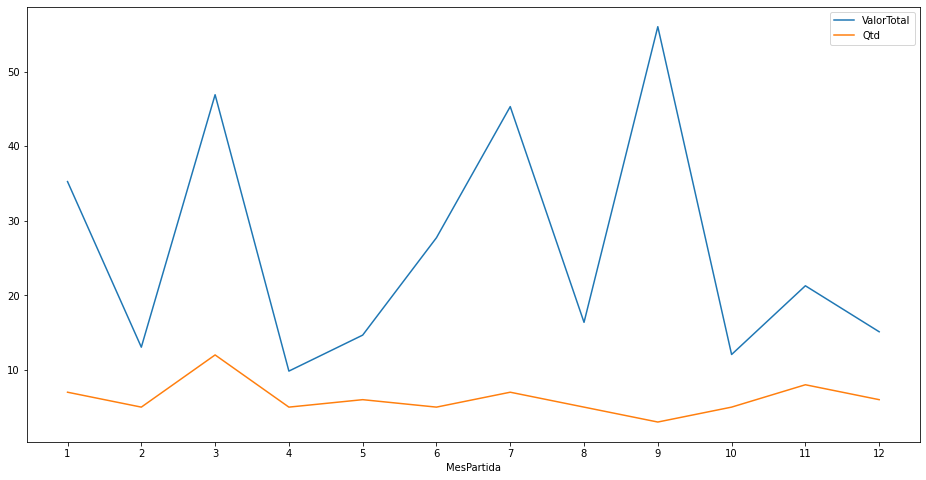

In [80]:
pd_gastador.plot(x="MesPartida", figsize=[16, 8], xticks=range(1, 13))

In [81]:
pd_gastador

,MesPartida,ValorTotal,Qtd
0,1,35.251120,7
1,2,13.040500,5
2,3,46.903740,12
3,4,9.831790,5
4,5,14.657381,6
5,6,27.721820,5
6,7,45.309600,7
7,8,16.373830,5
8,9,56.028870,3
9,10,12.057090,5
